In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [119]:
# Load your dataset 
df = pd.read_csv('electricity_consumption_timeseries (1).csv')
print(df.head())

              datetime  electricity_kwh
0  2024-01-01 00:00:00         2.099343
1  2024-01-01 01:00:00         2.101757
2  2024-01-01 02:00:00         2.379538
3  2024-01-01 03:00:00         2.658159
4  2024-01-01 04:00:00         2.386182


In [120]:
# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

In [121]:
# Set datetime as the index
df.set_index('datetime', inplace=True)

In [122]:
# extract hour and day of week
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()

In [123]:
# Grouping
hourly_avg = df.groupby('hour')['electricity_kwh'].mean()
daily_avg = df.groupby('day_of_week')['electricity_kwh'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

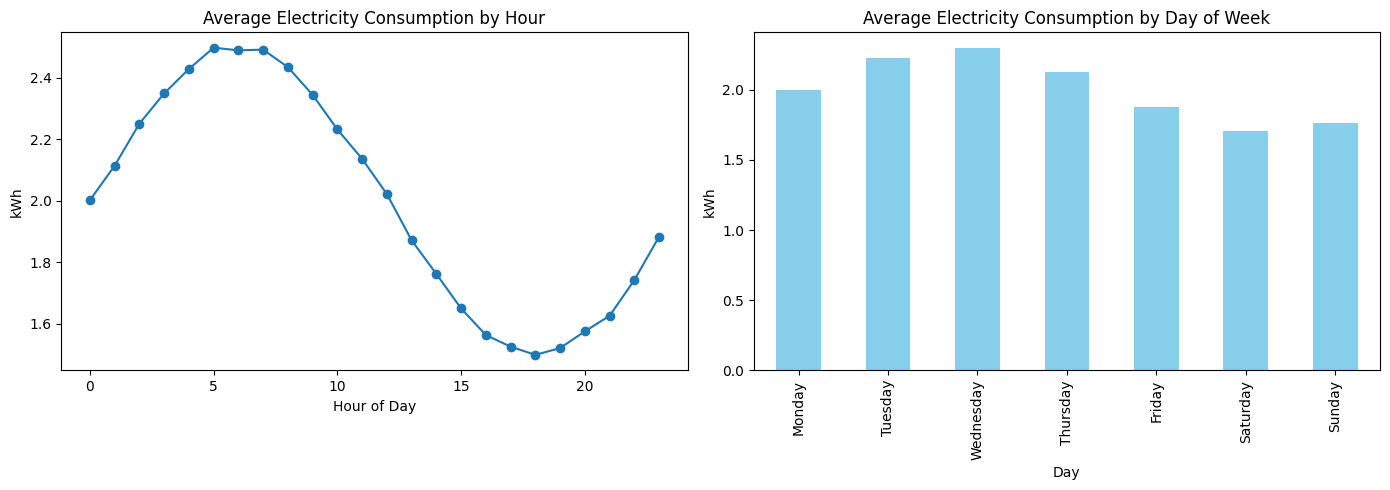

In [124]:
# Plotting

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
hourly_avg.plot(marker='o')
plt.title('Average Electricity Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('kWh')

plt.subplot(1, 2, 2)
daily_avg.plot(kind='bar', color='skyblue')
plt.title('Average Electricity Consumption by Day of Week')
plt.xlabel('Day')
plt.ylabel('kWh')

plt.tight_layout()
plt.show()

In [125]:
# Ensure electricity_kwh is numeric
df['electricity_kwh'] = pd.to_numeric(df['electricity_kwh'], errors='coerce')

In [ ]:

# Drop rows with NaNs in either index or data
df = df.dropna(subset=['electricity_kwh'])
df = df[~df.index.isna()] 
print(df.dtypes)

electricity_kwh    float64
hour                 int32
day_of_week         object
dtype: object


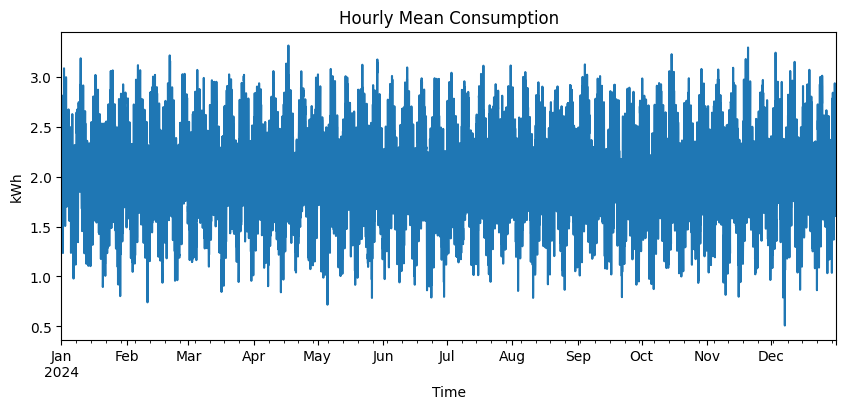

In [127]:
# Plot hourly consumption
df['electricity_kwh'].plot(title='Hourly Mean Consumption', figsize=(10, 4))
plt.xlabel('Time')
plt.ylabel('kWh')
plt.show()

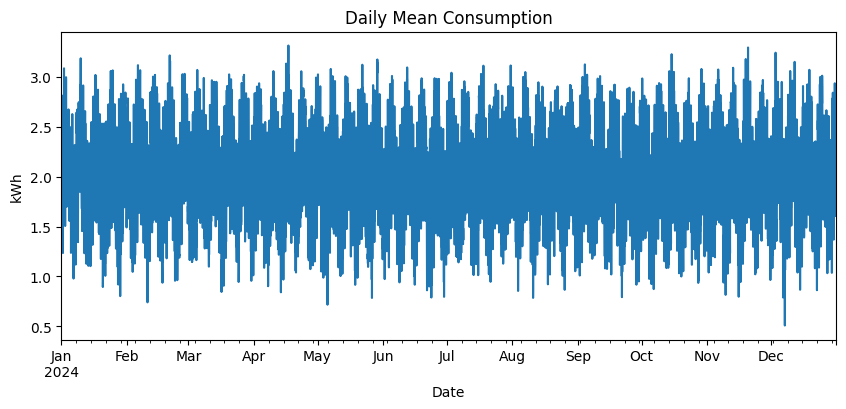

In [128]:

# Plot daily consumption
df['electricity_kwh'].plot(title='Daily Mean Consumption', figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('kWh')
plt.show()

In [129]:
# Rolling statistics
df['rolling_mean'] = df['electricity_kwh'].rolling(window=24).mean()
df['rolling_std'] = df['electricity_kwh'].rolling(window=24).std()

In [130]:
# Z-score method
df['z_score'] = (df['electricity_kwh'] - df['rolling_mean']) / df['rolling_std']
anomalies = df[np.abs(df['z_score']) > 3]

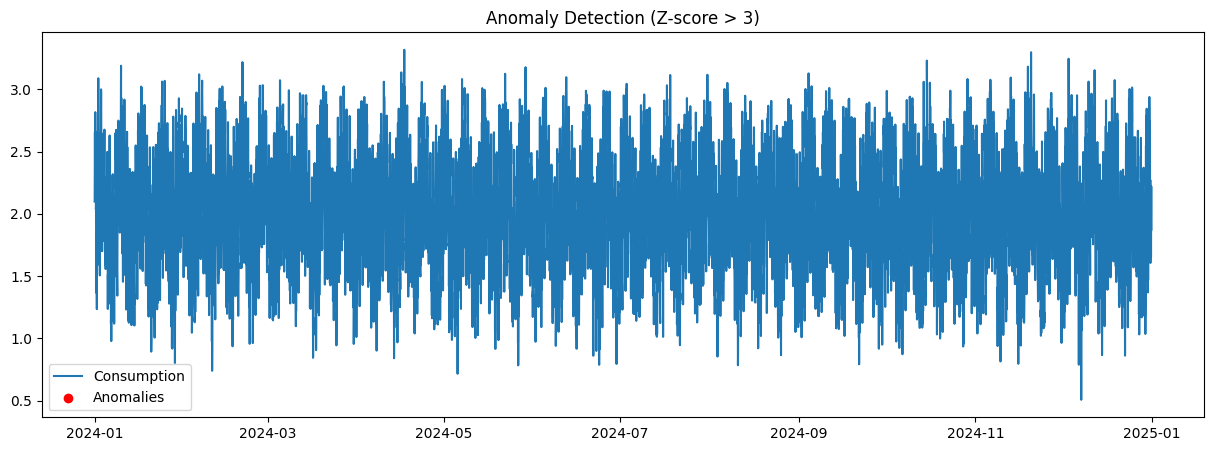

In [131]:
# Plot
plt.figure(figsize=(15, 5))
plt.plot(df['electricity_kwh'], label='Consumption')
plt.scatter(anomalies.index, anomalies['electricity_kwh'], color='red', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection (Z-score > 3)')
plt.show()

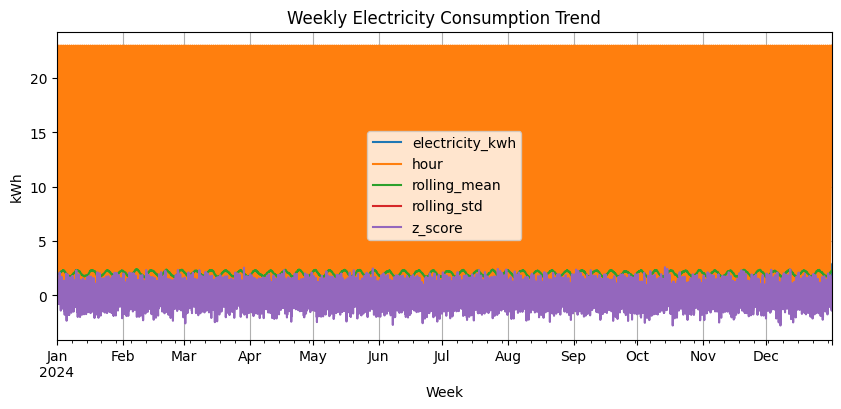

In [132]:
# Plot Weekly Trend
df.plot(title='Weekly Electricity Consumption Trend', figsize=(10, 4))
plt.xlabel('Week')
plt.ylabel('kWh')
plt.grid(True)
plt.show()

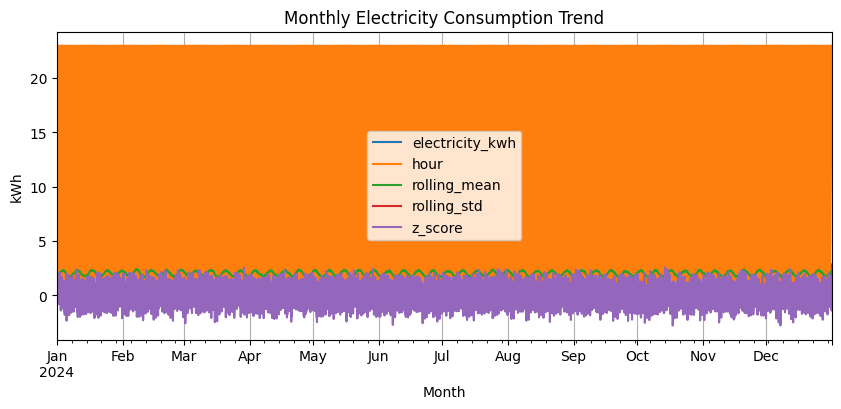

In [133]:
# Plot Monthly Trend
df.plot(title='Monthly Electricity Consumption Trend', figsize=(10, 4))
plt.xlabel('Month')
plt.ylabel('kWh')
plt.grid(True)
plt.show()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2024-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   electricity_kwh  8784 non-null   float64
 1   hour             8784 non-null   int32  
 2   day_of_week      8784 non-null   object 
 3   rolling_mean     8761 non-null   float64
 4   rolling_std      8761 non-null   float64
 5   z_score          8761 non-null   float64
dtypes: float64(4), int32(1), object(1)
memory usage: 446.1+ KB


In [135]:
print(df.shape)

(8784, 6)


In [139]:
daily_resampled = df['electricity_kwh'].resample('D').mean()

In [ ]:
# Anomaly Detection using Rolling Statistics (7-day window)
rolling_mean = daily_resampled.rolling(window=7).mean()
rolling_std = daily_resampled.rolling(window=7).std()

In [141]:
# Define anomaly bounds (±3 standard deviations)
anomaly_upper = rolling_mean + 3 * rolling_std
anomaly_lower = rolling_mean - 3 * rolling_std

In [142]:
# Identify anomalies
rolling_anomalies = daily_resampled[(daily_resampled > anomaly_upper) | (daily_resampled < anomaly_lower)]


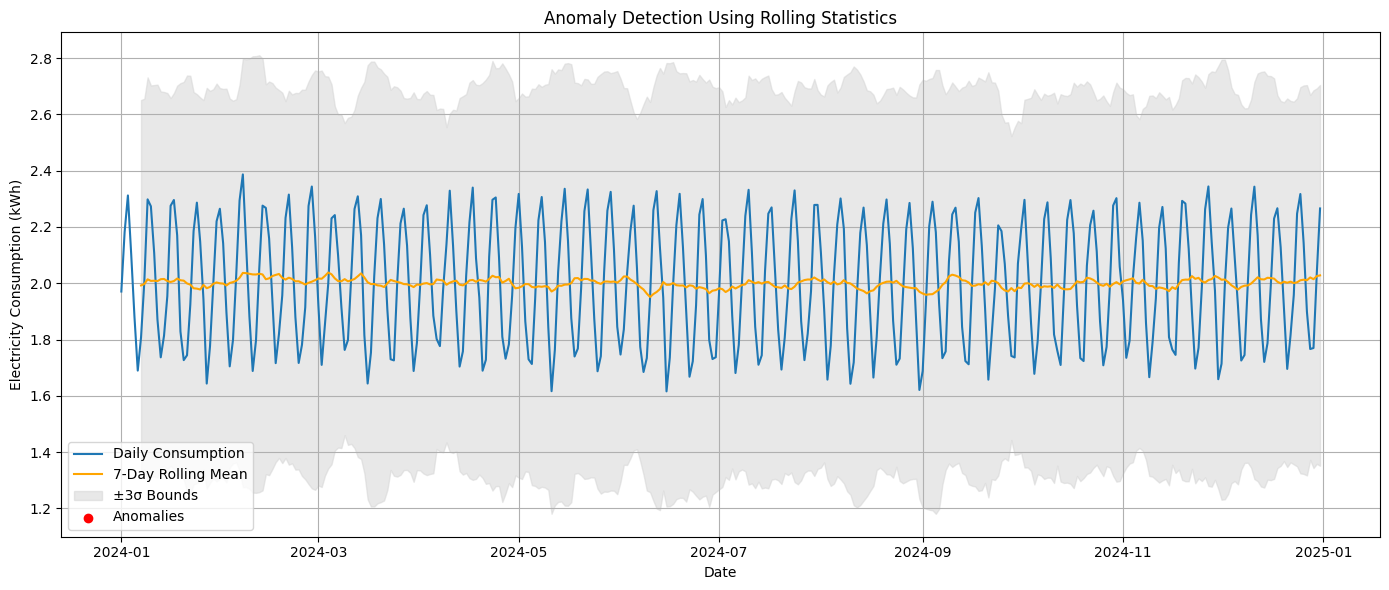

In [143]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(daily_resampled, label='Daily Consumption')
plt.plot(rolling_mean, label='7-Day Rolling Mean', color='orange')
plt.fill_between(rolling_mean.index, anomaly_lower, anomaly_upper, color='lightgray', alpha=0.5, label='±3σ Bounds')
plt.scatter(rolling_anomalies.index, rolling_anomalies.values, color='red', label='Anomalies')
plt.title('Anomaly Detection Using Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [144]:
# Q5 & Q6: Weekly and Monthly Trends
weekly_resampled = df['electricity_kwh'].resample('W').mean()
monthly_resampled = df['electricity_kwh'].resample('M').mean()

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_692\2824400026.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resampled = df['electricity_kwh'].resample('M').mean()


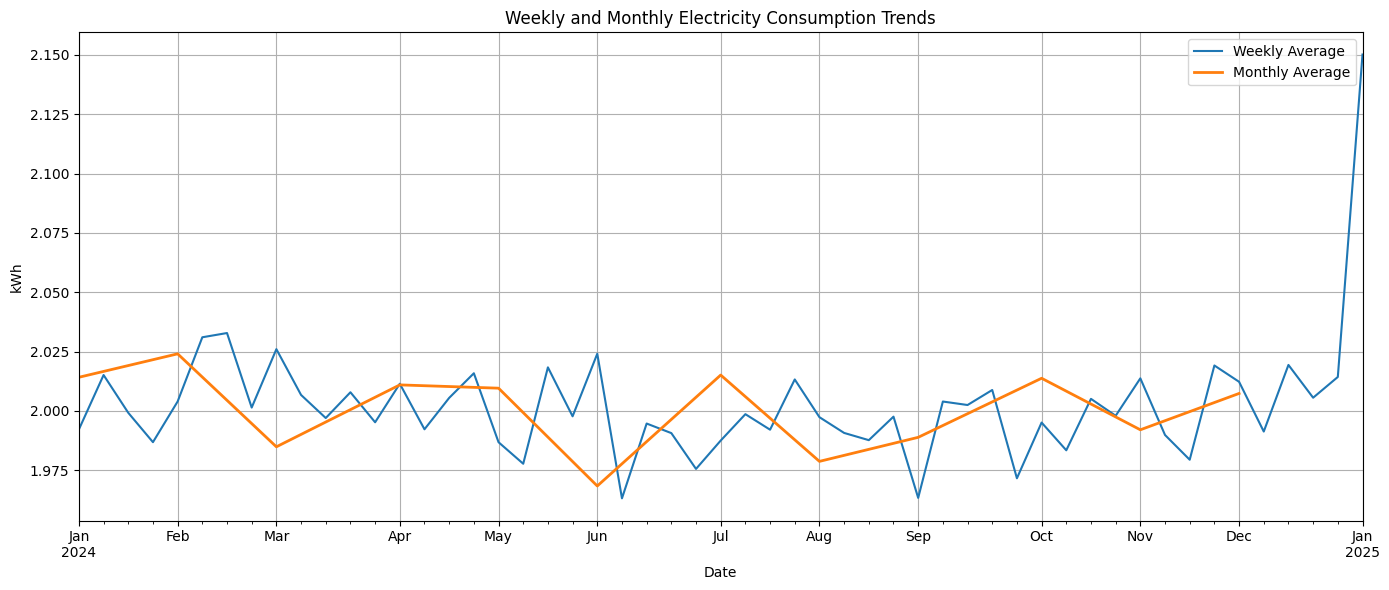

In [145]:
# Plot trends
plt.figure(figsize=(14, 6))
weekly_resampled.plot(label='Weekly Average', linewidth=1.5)
monthly_resampled.plot(label='Monthly Average', linewidth=2)
plt.title('Weekly and Monthly Electricity Consumption Trends')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [146]:
# Add column to mark weekends
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

In [147]:
# Separate usage
weekday_usage = df[df['is_weekend'] == False]['electricity_kwh']
weekend_usage = df[df['is_weekend'] == True]['electricity_kwh']


In [148]:
# Compute average usage
weekday_mean = weekday_usage.mean()
weekend_mean = weekend_usage.mean()

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_692\2996207520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Weekdays', 'Weekends'], y=[weekday_mean, weekend_mean], palette='Set2')


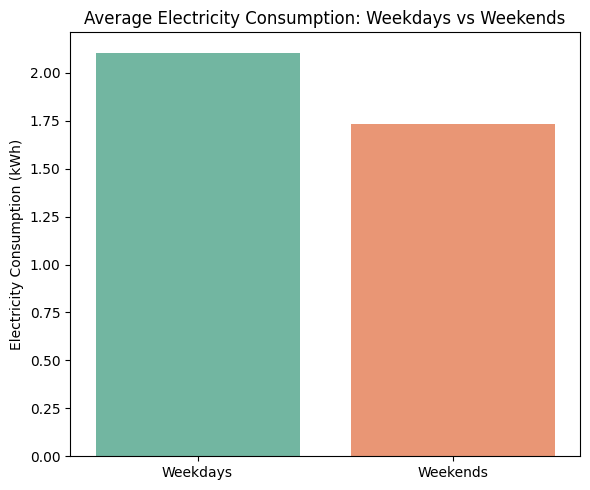

In [149]:
# Plot comparison

plt.figure(figsize=(6, 5))
sns.barplot(x=['Weekdays', 'Weekends'], y=[weekday_mean, weekend_mean], palette='Set2')
plt.title('Average Electricity Consumption: Weekdays vs Weekends')
plt.ylabel('Electricity Consumption (kWh)')
plt.tight_layout()
plt.show()

In [150]:
# Take the last 7 days and compute the average
last_7_days = daily_resampled[-7:]
moving_average_forecast = last_7_days.mean()

In [151]:
# Create a forecast for the next 7 days
forecast_dates = pd.date_range(start=daily_resampled.index[-1] + pd.Timedelta(days=1), periods=7)
forecast_values = pd.Series(moving_average_forecast, index=forecast_dates)


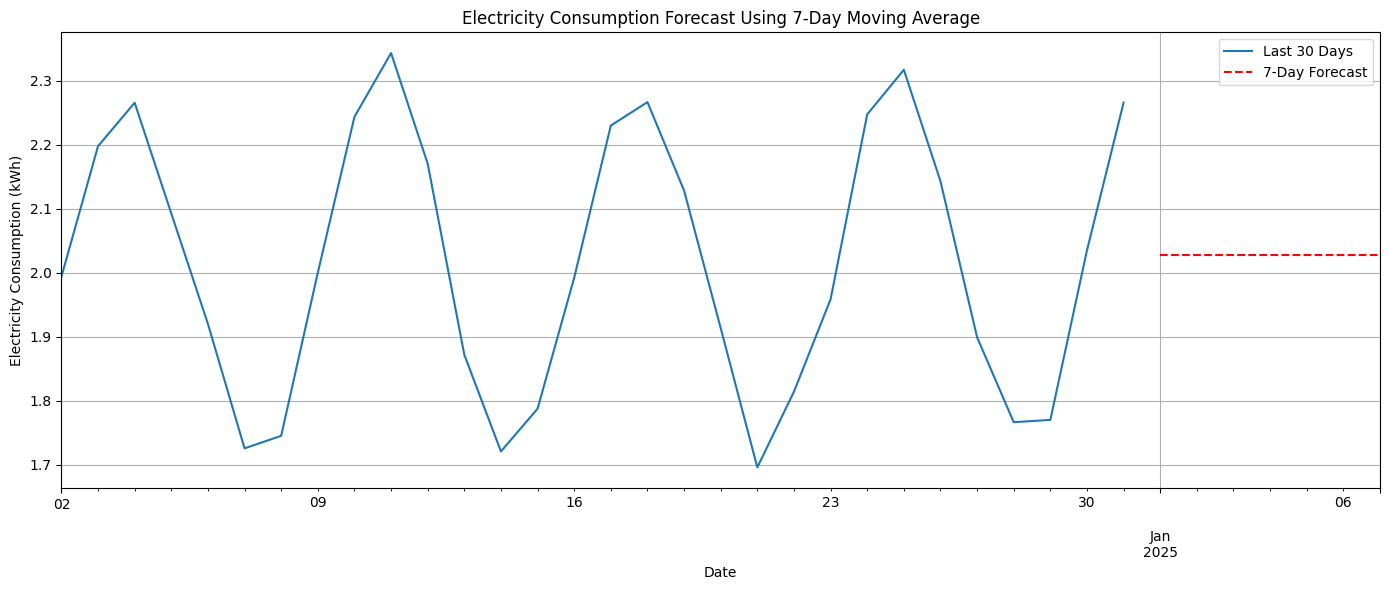

In [152]:
# Plot actual vs forecast
plt.figure(figsize=(14, 6))
daily_resampled[-30:].plot(label='Last 30 Days')
forecast_values.plot(label='7-Day Forecast', linestyle='--', color='red')
plt.title('Electricity Consumption Forecast Using 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [153]:
# Simple Moving Average (7-day)
sma_7 = daily_resampled.rolling(window=7).mean()

In [154]:
# Exponential Weighted Moving Average (span=7)
ewma_7 = daily_resampled.ewm(span=7, adjust=False).mean()

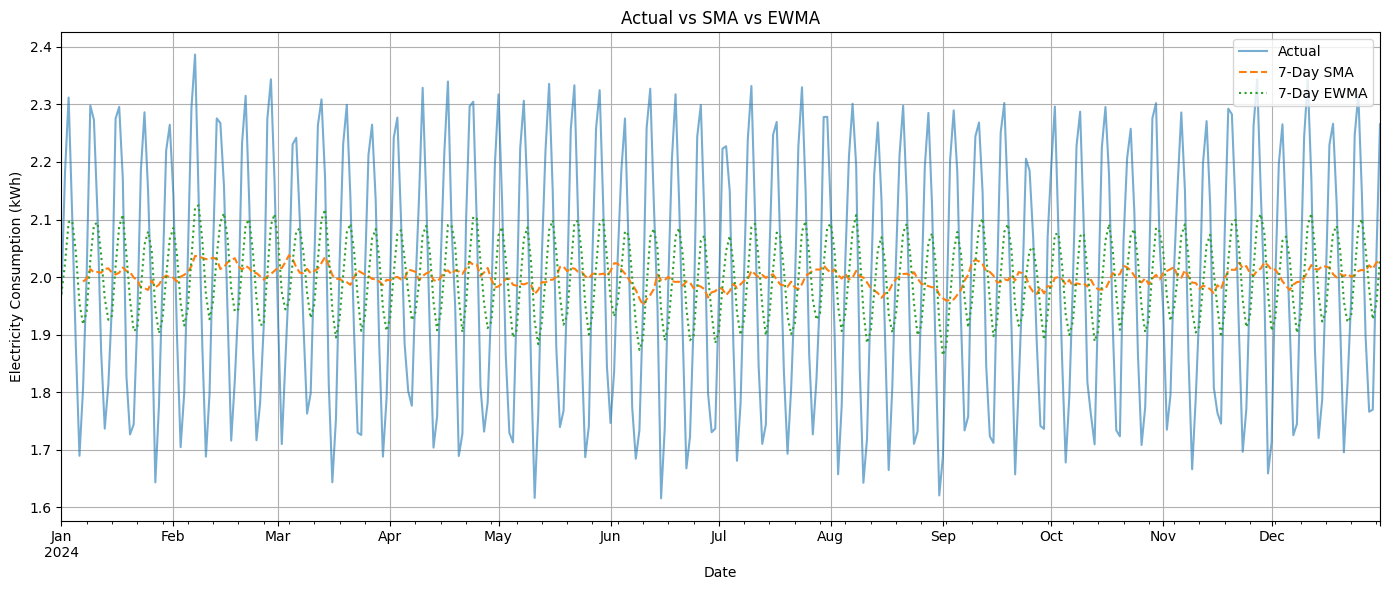

In [155]:
# Plot comparison
plt.figure(figsize=(14, 6))
daily_resampled.plot(label='Actual', alpha=0.6)
sma_7.plot(label='7-Day SMA', linestyle='--')
ewma_7.plot(label='7-Day EWMA', linestyle=':')
plt.title('Actual vs SMA vs EWMA')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [156]:
# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df.index.month.map(get_season)


In [157]:
# Average hourly usage per season
season_hourly = df.groupby(['season', 'hour'])['electricity_kwh'].mean().unstack(level=0)


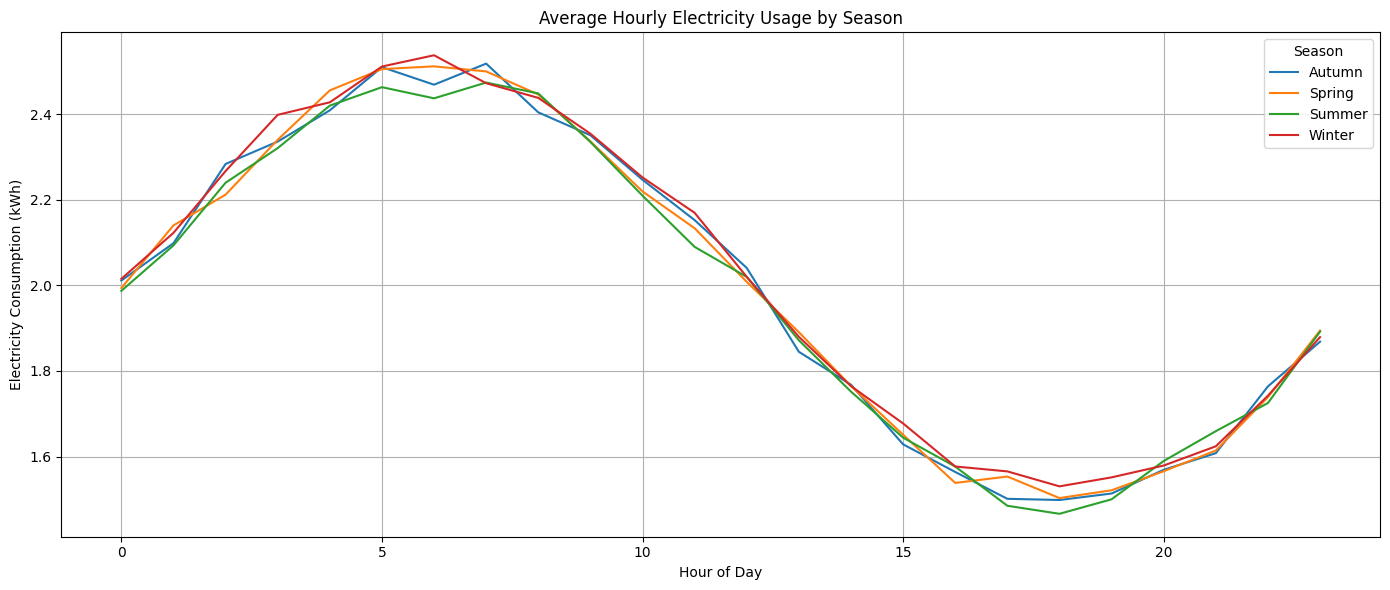

In [158]:
# Plot
season_hourly.plot(figsize=(14, 6))
plt.title('Average Hourly Electricity Usage by Season')
plt.xlabel('Hour of Day')
plt.ylabel('Electricity Consumption (kWh)')
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()
plt.show()